In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key
# Import the datetime module from the datetime library.
from datetime import datetime
import json
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

massakory td
waingapu id
rikitea pf
innoshima jp
pundaguitan ph
usoke tz
touros br
rikitea pf
atuona pf
hualmay pe
taolanaro mg
thinadhoo mv
havoysund no
bethel us
santa maria del oro mx
malinyi tz
lagunas pe
punta arenas cl
port elizabeth za
pevek ru
alofi nu
souillac mu
vaini to
victoria sc
ushuaia ar
port alfred za
camargo bo
busselton au
vaini to
ilebo cd
arman ru
barentsburg sj
esfarayen ir
fare pf
thompson ca
broken hill au
ambodifototra mg
santa maria cv
upernavik gl
cidreira br
talnakh ru
veraval in
mataura pf
amderma ru
punta arenas cl
warragul au
barrow us
mujiayingzi cn
puerto escondido mx
minatitlan mx
saint-philippe re
general roca ar
ushuaia ar
rikitea pf
caruaru br
longyearbyen sj
rikitea pf
rikitea pf
faanui pf
marawi sd
nioro ml
pozo colorado py
mar del plata ar
bluff nz
laje br
zhigansk ru
busselton au
dinguiraye gn
torbay ca
kodiak us
busselton au
sitka us
rikitea pf
port alfred za
busselton au
thompson ca
cherskiy ru
sistranda no
ribeira grande pt
port elizabeth za


jamestown sh
edd er
longyearbyen sj
goya ar
rikitea pf
taolanaro mg
strezhevoy ru
gerash ir
georgetown sh
kloulklubed pw
honiara sb
nizhneyansk ru
saint-philippe re
bluff nz
busselton au
new norfolk au
lubao cd
bambous virieux mu
xinglongshan cn
arraial do cabo br
rikitea pf
khed brahma in
ancud cl
kahului us
port alfred za
carnarvon au
port hardy ca
barra do corda br
avarua ck
amapa br
starosubkhangulovo ru
hilo us
avera pf
buala sb
khatanga ru
husavik is
kapaa us
hilo us
teya ru
ushuaia ar
castro cl
yellowknife ca
raga sd
vestmannaeyjar is
xacmaz az
pevek ru
korla cn
georgetown sh
puerto ayora ec
broken hill au
hasaki jp
suhbaatar mn
belushya guba ru
jamestown sh
peniche pt
provideniya ru
taolanaro mg
rikitea pf
yellowknife ca
ushuaia ar
rikitea pf
grand river south east mu
ushuaia ar
cape town za
ahipara nz
chokurdakh ru
shelburne ca
bambous virieux mu
amuntai id
ushuaia ar
sambava mg
jamame so
mataura pf
padang id
pimenta bueno br
illoqqortoormiut gl
biak id
ambilobe mg
buraydah sa

In [11]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

639

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# for i, item in enumerate(list):

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_description = city_weather["weather"][0]["description"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Country": city_country,
                          "Date": city_date,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Current description": city_description})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | massakory
Processing Record 2 of Set 1 | waingapu
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | innoshima
Processing Record 5 of Set 1 | pundaguitan
Processing Record 6 of Set 1 | usoke
Processing Record 7 of Set 1 | touros
Processing Record 8 of Set 1 | atuona
Processing Record 9 of Set 1 | hualmay
Processing Record 10 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 11 of Set 1 | thinadhoo
Processing Record 12 of Set 1 | havoysund
Processing Record 13 of Set 1 | bethel
Processing Record 14 of Set 1 | santa maria del oro
Processing Record 15 of Set 1 | malinyi
Processing Record 16 of Set 1 | lagunas
Processing Record 17 of Set 1 | punta arenas
Processing Record 18 of Set 1 | port elizabeth
Processing Record 19 of Set 1 | pevek
Processing Record 20 of Set 1 | alofi
Processing Record 21 of Set 1 | souillac
Processing Record 22 of Set 1 | vaini
Processing R

Processing Record 38 of Set 4 | calama
Processing Record 39 of Set 4 | fria
Processing Record 40 of Set 4 | ketchikan
Processing Record 41 of Set 4 | lorengau
Processing Record 42 of Set 4 | powassan
Processing Record 43 of Set 4 | nalut
Processing Record 44 of Set 4 | tilichiki
Processing Record 45 of Set 4 | cape town
Processing Record 46 of Set 4 | boende
Processing Record 47 of Set 4 | aflu
City not found. Skipping...
Processing Record 48 of Set 4 | marsh harbour
Processing Record 49 of Set 4 | sol-iletsk
Processing Record 50 of Set 4 | watertown
Processing Record 1 of Set 5 | mys shmidta
City not found. Skipping...
Processing Record 2 of Set 5 | atar
Processing Record 3 of Set 5 | itaituba
Processing Record 4 of Set 5 | salalah
Processing Record 5 of Set 5 | umm lajj
Processing Record 6 of Set 5 | ixcatlan
City not found. Skipping...
Processing Record 7 of Set 5 | cabedelo
Processing Record 8 of Set 5 | tuktoyaktuk
Processing Record 9 of Set 5 | yakeshi
Processing Record 10 of Set

Processing Record 26 of Set 8 | the pas
Processing Record 27 of Set 8 | bumba
Processing Record 28 of Set 8 | bundibugyo
Processing Record 29 of Set 8 | quatre cocos
Processing Record 30 of Set 8 | omsukchan
Processing Record 31 of Set 8 | jiazi
Processing Record 32 of Set 8 | chitungwiza
Processing Record 33 of Set 8 | tawkar
City not found. Skipping...
Processing Record 34 of Set 8 | petropavlovsk-kamchatskiy
Processing Record 35 of Set 8 | council bluffs
Processing Record 36 of Set 8 | batemans bay
Processing Record 37 of Set 8 | fortuna
Processing Record 38 of Set 8 | santa cruz del sur
Processing Record 39 of Set 8 | ares
Processing Record 40 of Set 8 | dhar
Processing Record 41 of Set 8 | kachiry
Processing Record 42 of Set 8 | olafsvik
Processing Record 43 of Set 8 | camacha
Processing Record 44 of Set 8 | bilibino
Processing Record 45 of Set 8 | togur
Processing Record 46 of Set 8 | cazaje
City not found. Skipping...
Processing Record 47 of Set 8 | edd
Processing Record 48 of S

Processing Record 13 of Set 12 | baykit
Processing Record 14 of Set 12 | timaru
Processing Record 15 of Set 12 | ebejico
Processing Record 16 of Set 12 | kytlym
City not found. Skipping...
Processing Record 17 of Set 12 | nsoko
Processing Record 18 of Set 12 | ayame
Processing Record 19 of Set 12 | lodwar
Processing Record 20 of Set 12 | namatanai
Processing Record 21 of Set 12 | aksarka
Processing Record 22 of Set 12 | sao sebastiao
Processing Record 23 of Set 12 | nouakchott
Processing Record 24 of Set 12 | kwinana
Processing Record 25 of Set 12 | karkaralinsk
City not found. Skipping...
Processing Record 26 of Set 12 | pionerskiy
Processing Record 27 of Set 12 | parabel
Processing Record 28 of Set 12 | makung
City not found. Skipping...
Processing Record 29 of Set 12 | freeport
Processing Record 30 of Set 12 | rudnogorsk
Processing Record 31 of Set 12 | eyl
Processing Record 32 of Set 12 | puerto vallarta
Processing Record 33 of Set 12 | ushtobe
Processing Record 34 of Set 12 | mapi

In [12]:
len(city_data)

585

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Current description
0,Massakory,TD,2021-08-14 16:53:35,12.9960,15.7293,84.00,68,99,6.29,overcast clouds
1,Waingapu,ID,2021-08-14 16:53:36,-9.6567,120.2641,76.23,83,29,12.06,scattered clouds
2,Rikitea,PF,2021-08-14 16:53:36,-23.1203,-134.9692,74.57,81,81,16.73,light rain
3,Innoshima,JP,2021-08-14 16:53:36,34.2833,133.1833,74.88,94,100,9.80,heavy intensity rain
4,Pundaguitan,PH,2021-08-14 16:53:37,6.3711,126.1689,82.94,72,96,6.85,overcast clouds
5,Usoke,TZ,2021-08-14 16:53:37,-5.1667,32.3500,77.23,26,15,6.08,few clouds
6,Touros,BR,2021-08-14 16:53:37,-5.1989,-35.4608,88.70,52,40,20.87,scattered clouds
7,Atuona,PF,2021-08-14 16:53:38,-9.8000,-139.0333,77.81,80,28,17.34,scattered clouds
8,Hualmay,PE,2021-08-14 16:53:38,-11.0964,-77.6139,66.97,69,42,9.86,scattered clouds
9,Thinadhoo,MV,2021-08-14 16:53:39,0.5333,72.9333,82.92,72,54,16.33,broken clouds


In [14]:
#Create the output file (CSV).
output_data_file = "WeatherPy_Database.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [18]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'08/14/21'

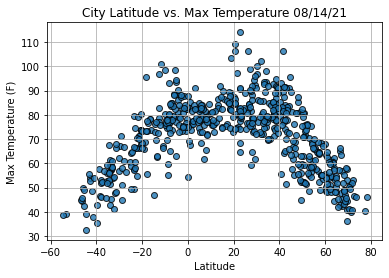

In [21]:
# Import the time module.
import time
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

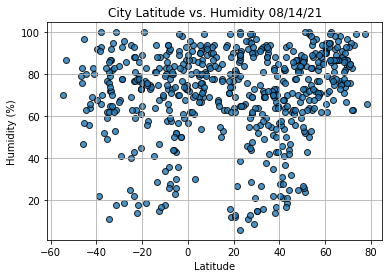

In [22]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

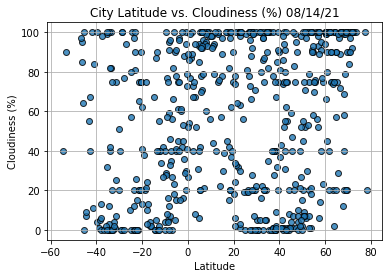

In [23]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

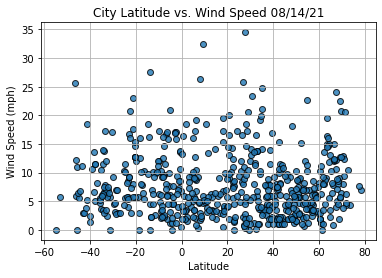

In [24]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [26]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [28]:
#Perform regression analysis on the maximum temperatures in the Northern and Southern Hemispheres
#Create Northern Hemisphere DataFrames from the city_data_df DataFrame
index13 = city_data_df.loc[13]
index13

City                               Malinyi
Country                                 TZ
Date                   2021-08-14 16:53:40
Lat                                -8.9333
Lng                                36.1333
Max Temp                             74.41
Humidity                                58
Cloudiness                              77
Wind Speed                            2.01
Current description          broken clouds
Name: 13, dtype: object

In [29]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Current description
0,Massakory,TD,2021-08-14 16:53:35,12.9960,15.7293,84.00,68,99,6.29,overcast clouds
3,Innoshima,JP,2021-08-14 16:53:36,34.2833,133.1833,74.88,94,100,9.80,heavy intensity rain
4,Pundaguitan,PH,2021-08-14 16:53:37,6.3711,126.1689,82.94,72,96,6.85,overcast clouds
9,Thinadhoo,MV,2021-08-14 16:53:39,0.5333,72.9333,82.92,72,54,16.33,broken clouds
10,Havoysund,NO,2021-08-14 16:53:39,70.9963,24.6622,50.88,85,97,9.40,overcast clouds


In [30]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

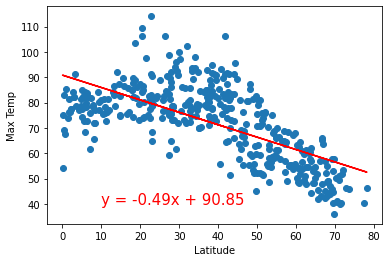

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

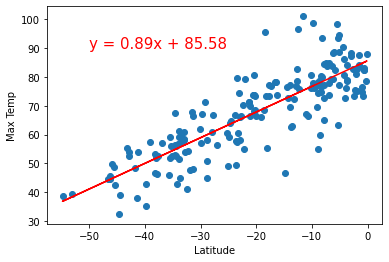

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

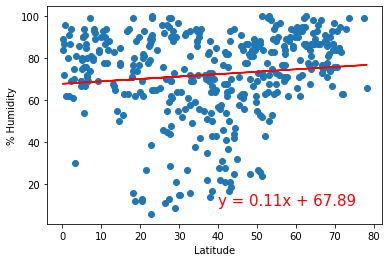

In [35]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

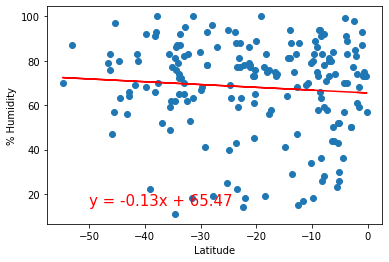

In [37]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

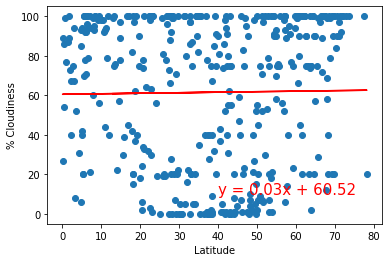

In [42]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

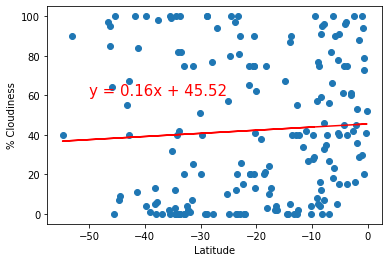

In [39]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

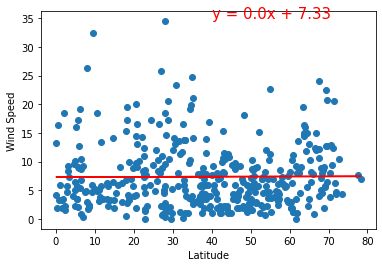

In [46]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

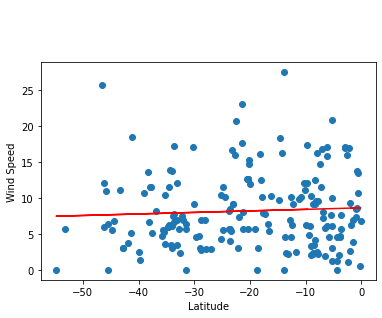

In [48]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))